<a href="https://colab.research.google.com/github/AliUmrani07/Boston-Housing-data-/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
 columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.data', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.to_csv('/content/drive/My Drive/mydata.csv', index=False)

In [27]:
# Check the shape of the dataset
print(f"\nDataset shape: {df.shape}")

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics for numerical features:")
print(df.describe())

# Check data types
print("\nData types of each column:")
print(df.dtypes)



Dataset shape: (150, 5)

Missing values in each column:
Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class_labels    0
dtype: int64

Summary statistics for numerical features:
       Sepal length  Sepal width  Petal length  Petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Data types of each column:
Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Class_labels     object
dtype: object


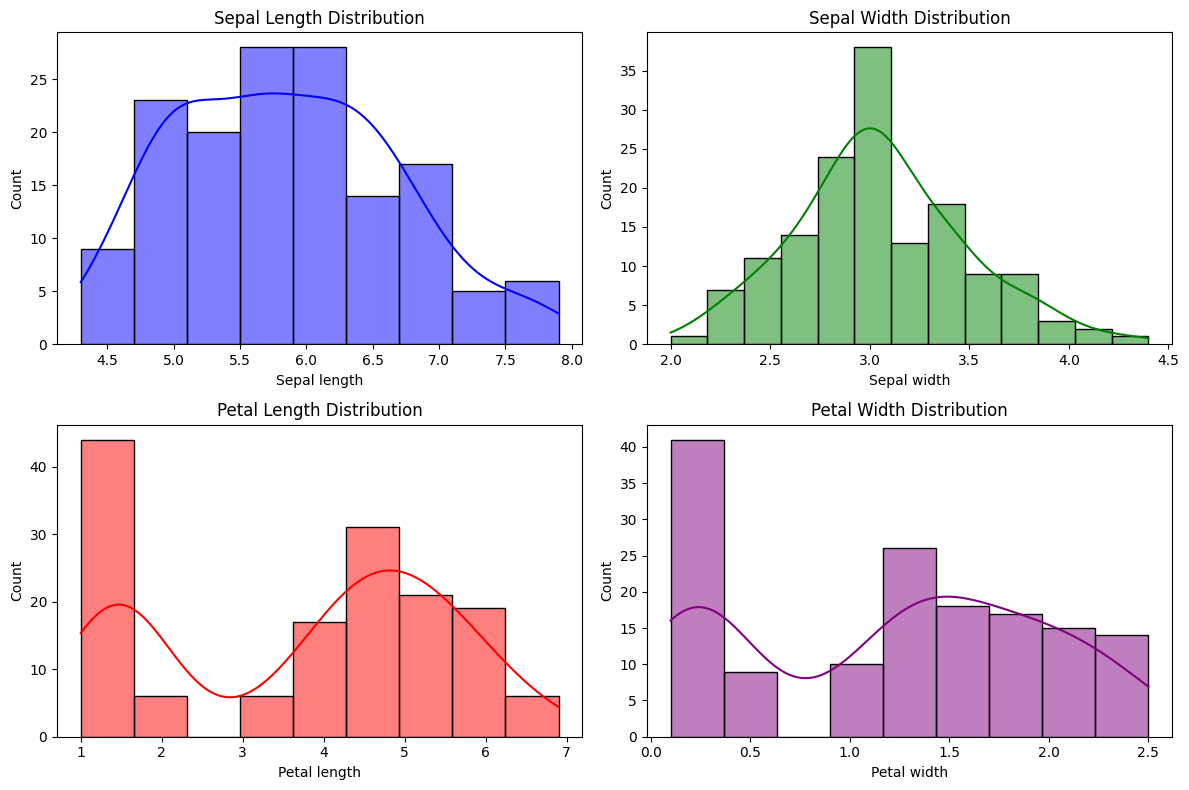

In [28]:
# Plot distributions of numerical features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Sepal length'], kde=True, color='blue')
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Sepal width'], kde=True, color='green')
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Petal length'], kde=True, color='red')
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Petal width'], kde=True, color='purple')
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()

<ipython-input-29-36605ac3a163>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class_labels', data=df, palette='Set2')


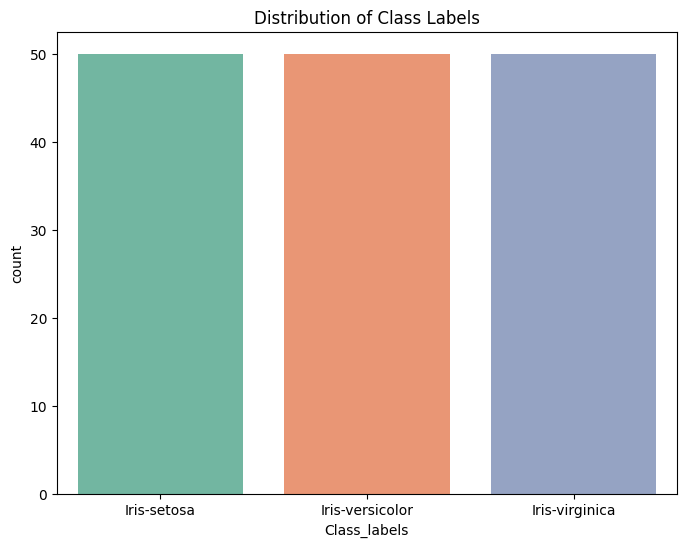

In [29]:
# Plot the distribution of the target variable (Class_labels)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class_labels', data=df, palette='Set2')
plt.title('Distribution of Class Labels')
plt.show()

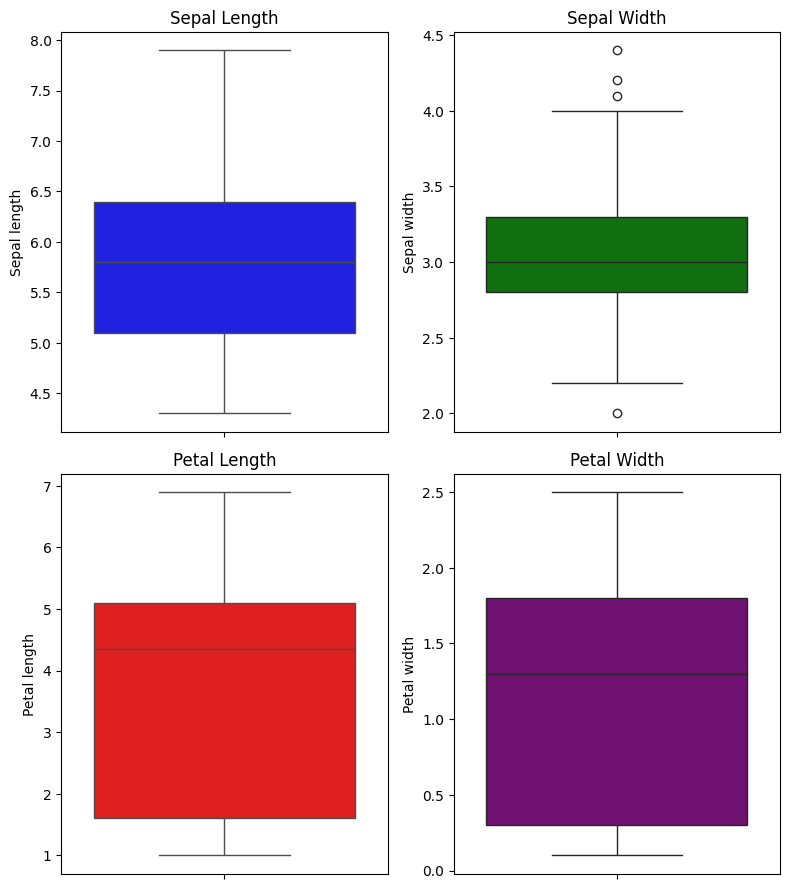

In [30]:
# Boxplots for numerical features
plt.figure(figsize=(8, 9))
plt.subplot(2, 2, 1)
sns.boxplot(y=df['Sepal length'], color='blue')
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['Sepal width'], color='green')
plt.title('Sepal Width')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['Petal length'], color='red')
plt.title('Petal Length')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['Petal width'], color='purple')
plt.title('Petal Width')

plt.tight_layout()
plt.show()

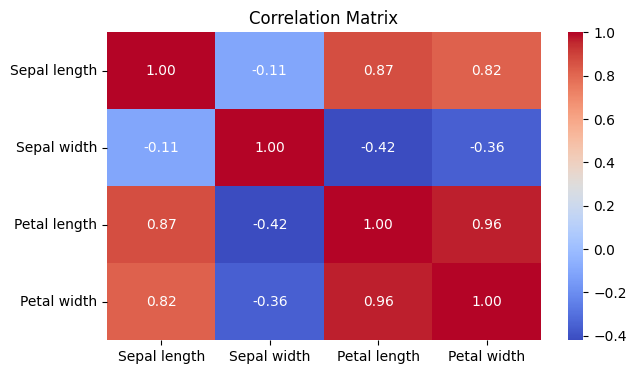

In [31]:
# Correlation matrix
corr_matrix = (df.drop(columns=['Class_labels'])).corr()
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

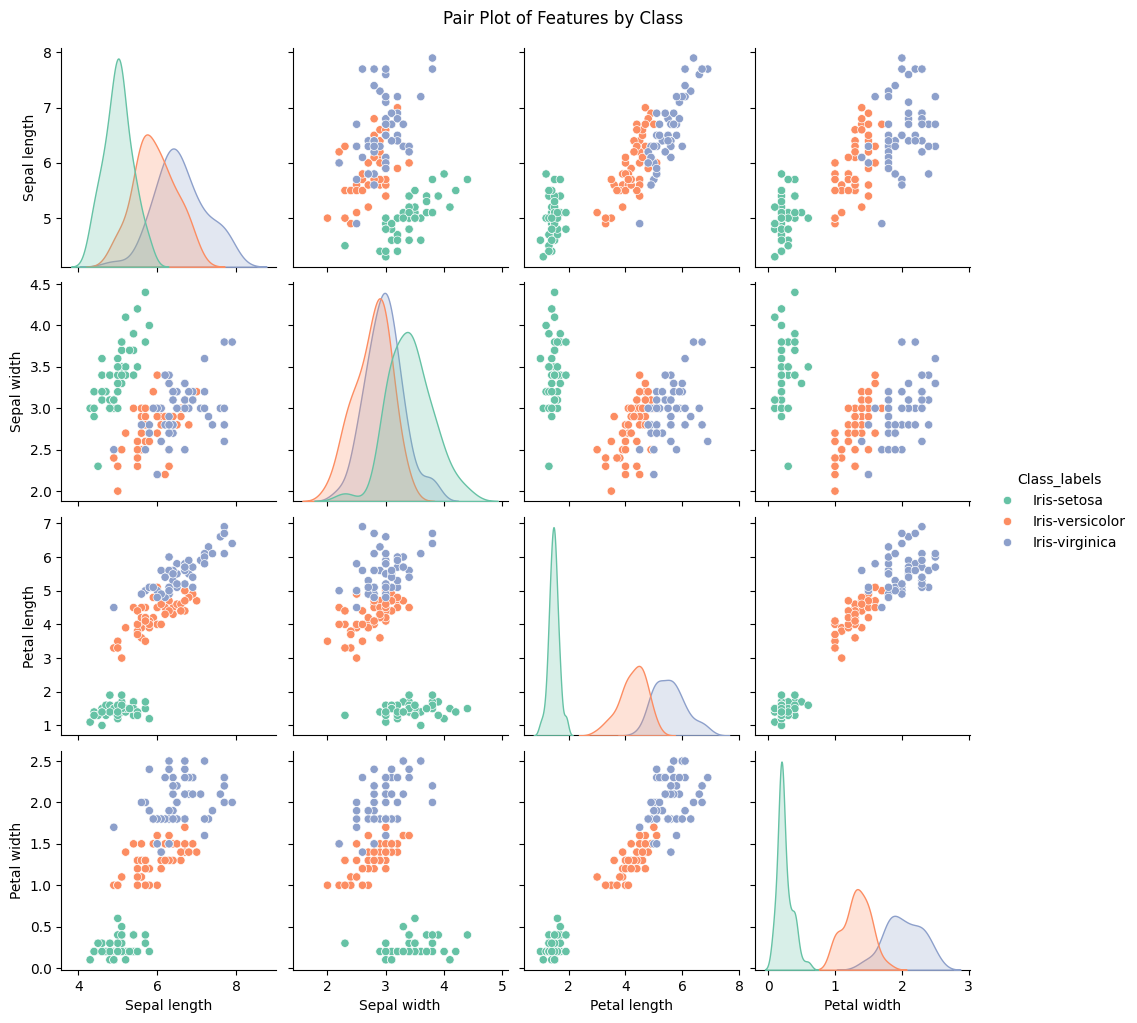

In [32]:
# Pair plot to visualize class separation
sns.pairplot(df, hue='Class_labels', palette='Set2')
plt.suptitle('Pair Plot of Features by Class', y=1.02)
plt.show()

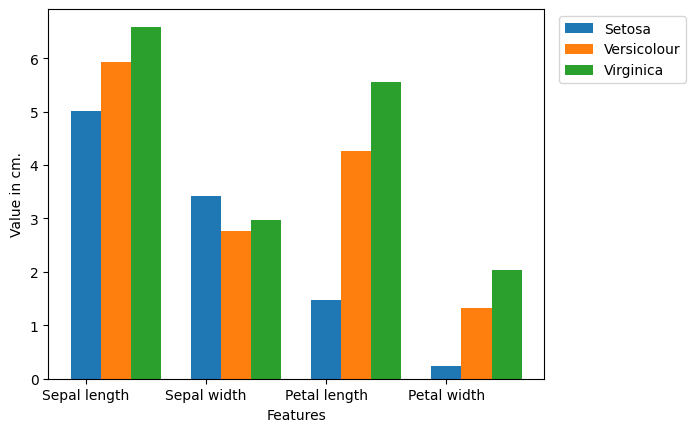

In [33]:
# Separate features and target
data = df.values

X = data[:, 0:4]
Y = data[:,4]
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


# Encode the target variable
le = LabelEncoder()
df['Class_labels'] = le.fit_transform(df['Class_labels'])

# Split features and target
X = df.drop('Class_labels', axis=1)
y = df['Class_labels']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model and scaler
joblib.dump(model, 'iris_model.pkl')
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [35]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Error analysis: Identify misclassified samples
misclassified = X_test[y_test != y_pred]
if len(misclassified) > 0:
    misclassified['True Label'] = y_test[y_test != y_pred]
    misclassified['Predicted Label'] = y_pred[y_test != y_pred]
    # Map encoded labels back to original class names
    misclassified['True Label'] = le.inverse_transform(misclassified['True Label'])
    misclassified['Predicted Label'] = le.inverse_transform(misclassified['Predicted Label'])
    print("\nMisclassified Samples:")
    print(misclassified)

else:
    print("No misclassified samples found.")



Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
No misclassified samples found.
